In [1]:
import pandas as pd
df = pd.read_csv("OUTCOME_DIAGNOSIS_processed.csv", header=0)

In [25]:
dementia_cnt, _ = df[df['G21'] > 0].shape
print(f"Clinical Diagnosis (Dementia?) diagnosed in {dementia_cnt} participants")

Clinical Diagnosis (Dementia?) diagnosed in 296 participants


In [30]:
dementia_subset = df[df['G21'] > 0]

In [32]:
dementia_subset['ZCO'].describe()

count    287.000000
mean      -1.220086
std        1.051058
min       -5.136985
25%       -1.864111
50%       -1.043965
75%       -0.411267
max        1.034252
Name: ZCO, dtype: float64

In [33]:
non_dementia_subset = df[df['G21'] == 0]

In [34]:
non_dementia_subset['ZCO'].describe()

count    1300.000000
mean       -0.120069
std         0.715383
min        -3.722961
25%        -0.547752
50%        -0.016972
75%         0.409721
max         1.370247
Name: ZCO, dtype: float64

In [73]:
zco_median_non_dementia = non_dementia_subset['ZCO'].median()
print(f"Median for participants not diagnosed with dementia {zco_median_non_dementia:.3f}")

Median for participants not diagnosed with dementia -0.017


In [55]:
G21_ZCO_sub = df[['G21', 'ZCO']]
G21_ZCO_sub.dropna()
G21_ZCO_sub = G21_ZCO_sub[G21_ZCO_sub["ZCO"].notna()]

In [ ]:
G21_ZCO_sub['Diagnosis'] = G21_ZCO_sub['G21'].apply(lambda c: "Dementia" if c > 0 else "Normal")

In [64]:
G21_ZCO_sub.head()

,G21,ZCO,Diagnosis
0,0.0,0.110465,Normal
1,0.0,-0.630361,Normal
2,2.0,-2.870535,Dementia
4,1.0,-1.878924,Dementia
5,0.0,-0.152946,Normal


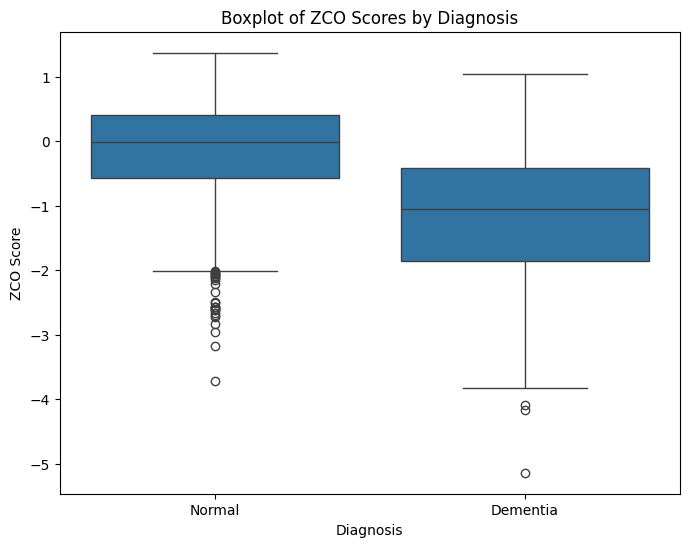

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='ZCO', data=G21_ZCO_sub)

plt.xlabel('Diagnosis')
plt.ylabel('ZCO Score')
plt.title('Boxplot of ZCO Scores by Diagnosis')

plt.show()